In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#sns.set()

# MPL Setup
GOLD = (1 + np.sqrt(5))/2
mpl.rc('font', **{'size': 14})
mpl.rc('figure', **{'figsize': (10, 10/GOLD)})

# `Project 1: Global Carbon Project`

### Data supplement to the Global Carbon Budget 2021

In [2]:
#![](GCP_banner_1100px.png)
from IPython.display import Image
Image(url= "GCP_banner_1100px.png")

### Let's open the dataset

In [2]:
#skipping the information in the header
glbCarbonBudg=pd.read_excel('Global_Carbon_Budget_2021v0.4.xlsx', sheet_name='Global Carbon Budget',\
                 skiprows=20)

### Data Exploration

Let's first have a descriptive exploration on our data.



In [4]:
glbCarbonBudg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    62 non-null     float64
 1   fossil emissions excluding carbonation  62 non-null     float64
 2   land-use change emissions               62 non-null     float64
 3   atmospheric growth                      62 non-null     float64
 4   ocean sink                              62 non-null     float64
 5   land sink                               62 non-null     float64
 6   cement carbonation sink                 62 non-null     float64
 7   budget imbalance                        62 non-null     float64
dtypes: float64(8)
memory usage: 4.0 KB


### Data cleaning 
Let's make new copy keeping the original intact 
Downgrade the columns by combining col 1& 6 which is the total fossil emission including carbonation

In [23]:
new_glb=glbCarbonBudg.copy()  
new_glb.loc[:,'fossil emissions excluding carbonation'] += new_glb.loc[:,'cement carbonation sink']
new_glb=new_glb.drop(columns='cement carbonation sink')

### Some information of the dataset:
* Year: data taken time
* FOSSIL_EM: Fossil CO$_{2}$ emissions (EFOS) based on energy statistics and cement production data
* LAND_EM: Emissions from land-use change (ELUC) mainly from deforestation
* ATM_ABS: Atmospheric CO$_{2}$ growth rate (GATM) is computed from the annual changes in concentration
* OCEAN_ABS: Ocean CO2 sink (SOCEAN) is estimated using global ocean biogeochemistry models 
* LAND_ABS: Terrestrial CO$_{2}$ sink (SLAND) is estimated with dynamic global vegetation models
* IMBALANCE: Carbon budget imbalance (BIM) is the difference between the estimated total emissions and the estimated total absorbtion

### Quick statistical summary for each column

In [24]:
col_names=['YEAR','FOSSIL_EM', 'LAND_EM', 'ATM_ABS', 'OCEAN_ABS','LAND_ABS','IMBALANCE']
new_glb.columns=col_names
new_glb.drop(columns='YEAR').describe()

,FOSSIL_EM,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,6.279107,1.295076,3.361401,1.850953,2.150436,0.048872
std,2.307714,0.205203,1.413126,0.599745,0.994261,0.769478
min,2.429766,0.876090,1.040760,0.754060,0.286471,-1.810323
25%,4.688363,1.172131,2.272680,1.332858,1.498529,-0.502069
50%,6.197593,1.269722,3.217860,1.860698,2.233529,-0.014491
75%,8.126971,1.346078,4.534740,2.260718,2.931765,0.590442
max,10.232356,1.862120,6.265800,2.994931,3.941176,1.810464


#### Data visualization for all components with year

<IPython.core.display.Javascript object>


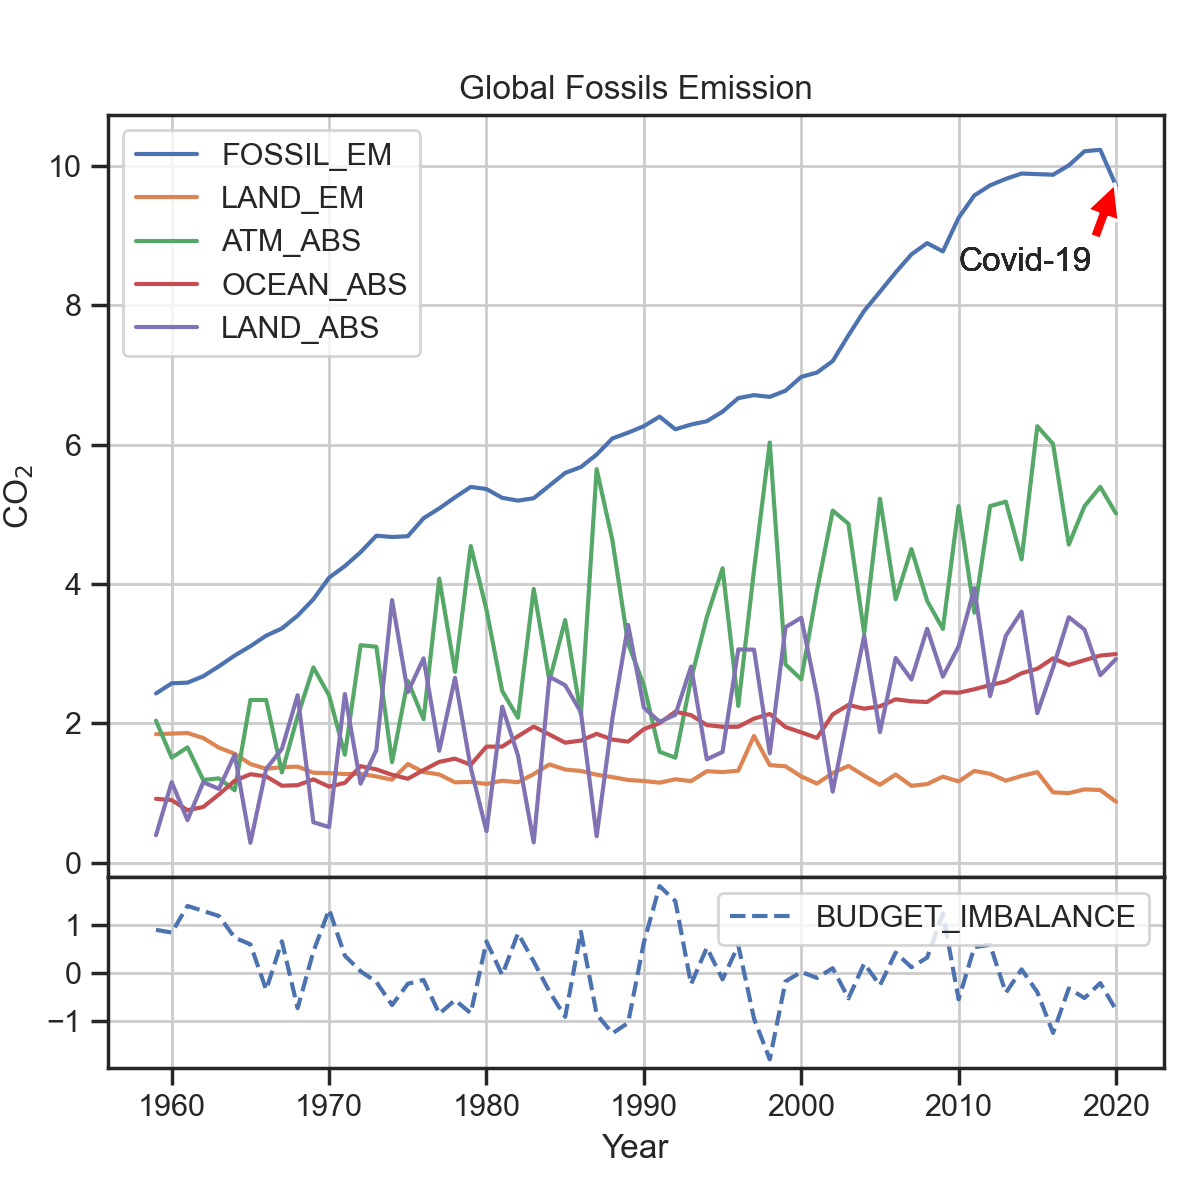

In [7]:
%matplotlib notebook
sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 1,figsize=(6,6), gridspec_kw={'height_ratios': [4, 1]})
for i in new_glb.columns[1:6]:
    ax[0].plot(new_glb['YEAR'], new_glb[i], label=i)
    ax[0].annotate('Covid-19', xy=(2020, 9.79), xytext=(2010, 8.5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
    ax[0].set_title('Global Fossils Emission')
    ax[0].set_ylabel('CO$_2$')
    ax[0].legend()
    ax[0].grid()
ax[1].plot(new_glb['YEAR'], new_glb['IMBALANCE'], linestyle='--',label='BUDGET_IMBALANCE')
ax[1].set_xlabel('Year')
_= ax[1].legend()
_ = ax[1].grid()
plt.subplots_adjust(left=0.09, right=0.97,hspace=0.00,top=0.904,
                wspace=0.00)

Clearly the plots show linear growth in carbon emission whereas other emissions and absorbtions are not so high compare to fossil emission

#### The contribution from all components can be visually seen using Pie Chart

In [8]:
new_glb_2=new_glb.drop(columns=['YEAR','IMBALANCE'])
sizes=np.sum(new_glb_2)
values=[]
label_names=[]
for i in sizes/np.sum(sizes):
    values.append(i)
for j in new_glb_2.columns:
    label_names.append(j)
#print(values)
#print(label_names)

<IPython.core.display.Javascript object>


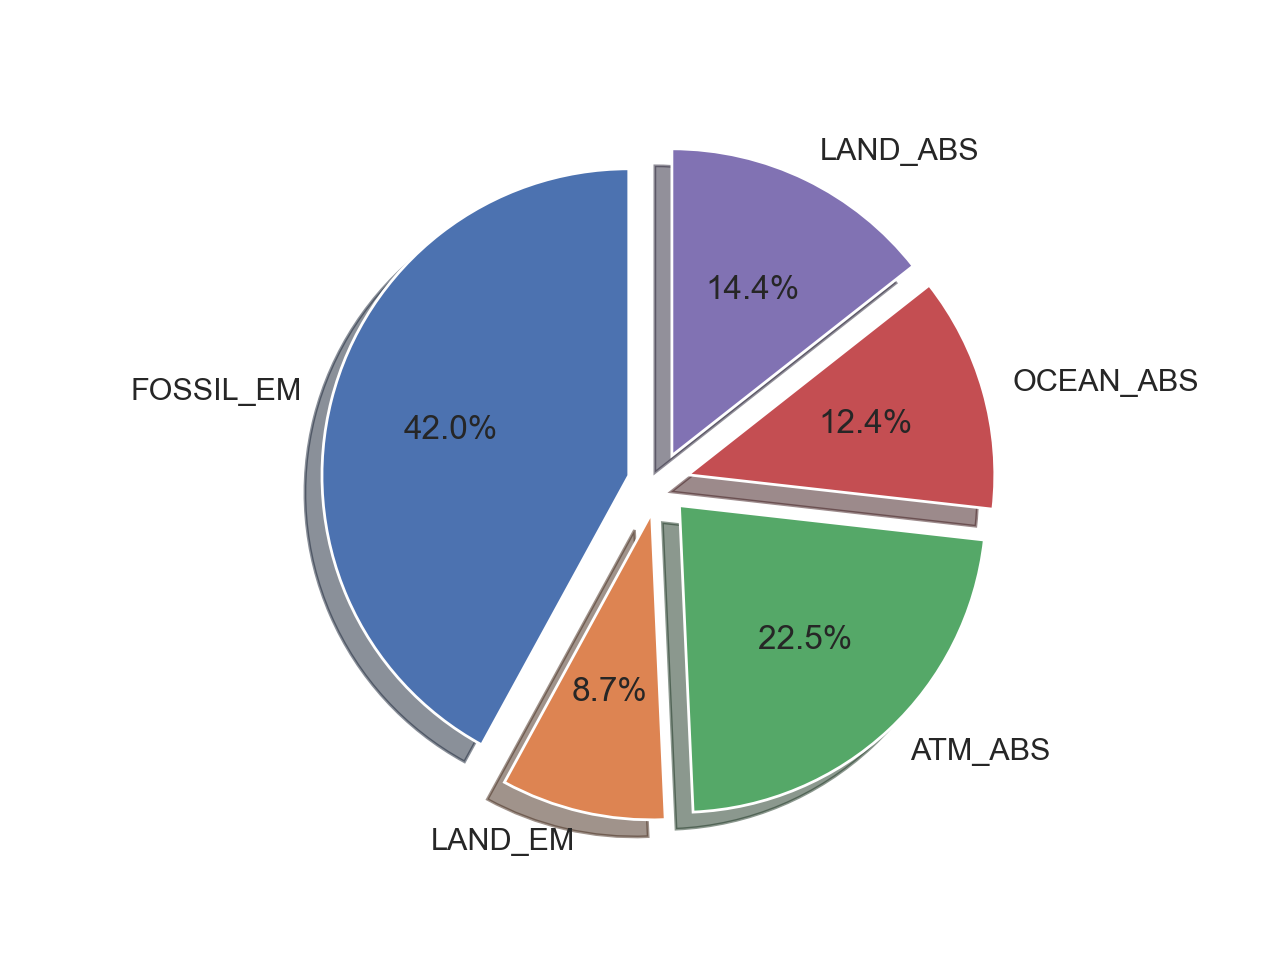

In [9]:
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
ax.pie(values, explode=explode, labels=label_names, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
plt.show()

#### We can also check correlation between the components using Scatter plot
##### clearly we can see there is correlation (linear) between the atmospheric absorbtion and fossil emission. The growth is linear in time also

<IPython.core.display.Javascript object>


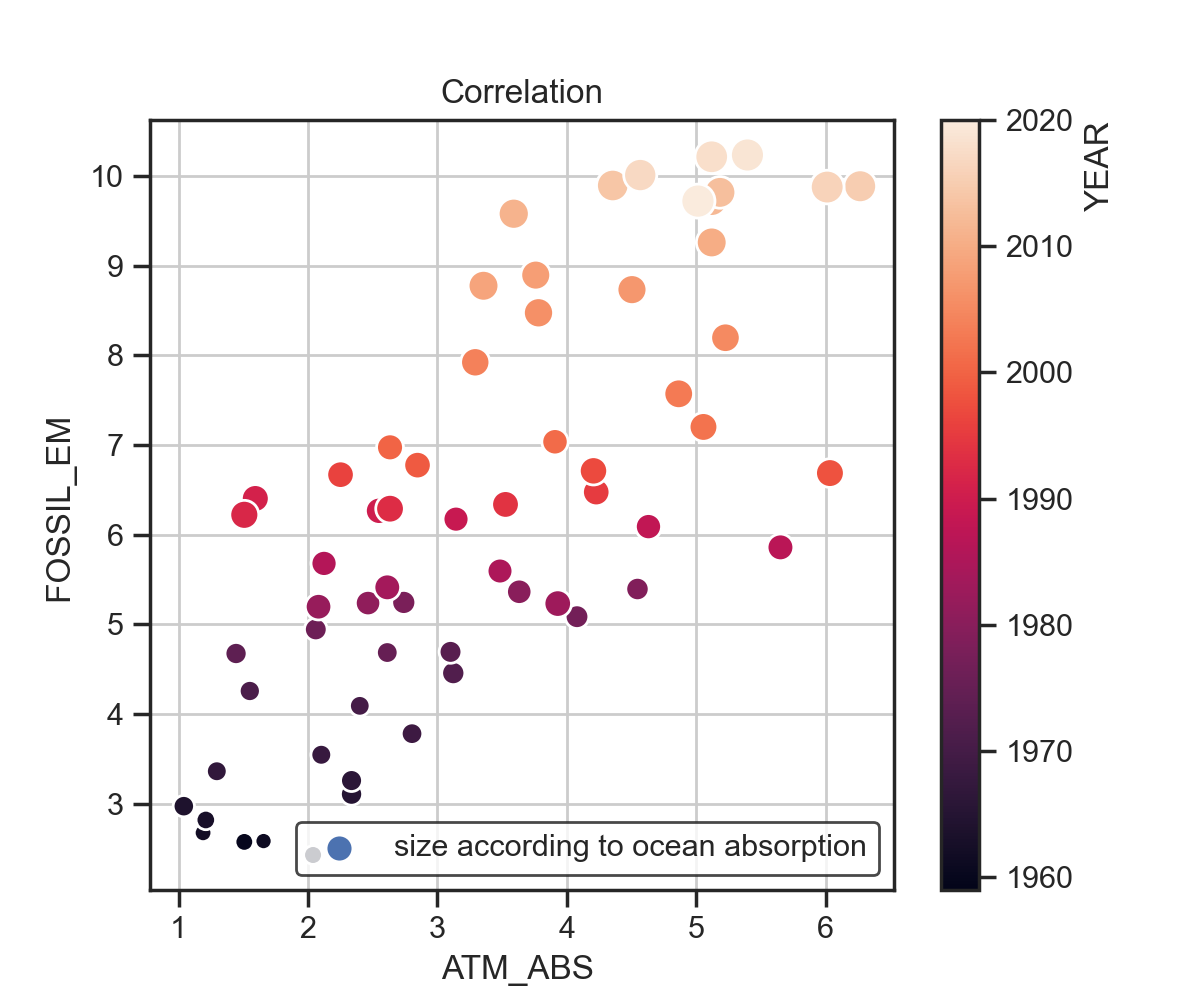

In [10]:
fig, ax = plt.subplots(figsize=(6,5))

ax.grid(True)
cor= ax.scatter(new_glb['ATM_ABS'], new_glb['FOSSIL_EM'],label='size according to ocean absorption', \
                s=50*new_glb['OCEAN_ABS'],c=new_glb['YEAR'], edgecolor='w')
cbar = fig.colorbar(cor)
cbar.set_label("YEAR", loc='top')

_ = ax.set_xlabel('ATM_ABS ')
_ = ax.set_ylabel('FOSSIL_EM ')
_ = ax.set_title('Correlation')
_ = ax.legend(edgecolor='k')

### Let's use Simple Regression Model




In [11]:
msk = np.random.rand(len(new_glb)) < 0.8
train = new_glb[msk]
test = new_glb[~msk]

### Modeling

Using sklearn  let's model the data.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ATM_ABS']])
train_y = np.asanyarray(train[['FOSSIL_EM']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.37275242]]
Intercept:  [1.73163979]


We can plot the fit line over the data:



<IPython.core.display.Javascript object>


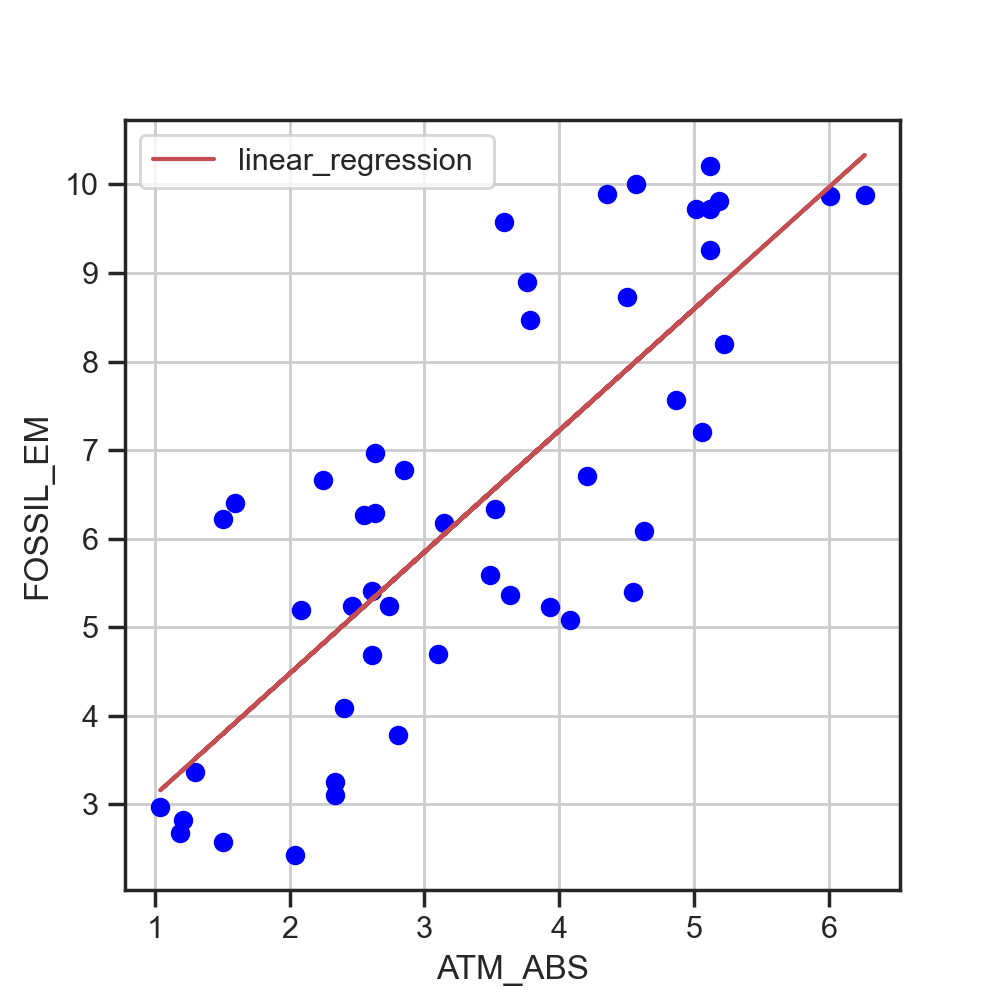

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(train.ATM_ABS, train.FOSSIL_EM,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label='linear_regression ')
plt.xlabel("ATM_ABS")
plt.ylabel("FOSSIL_EM")
plt.grid()
plt.legend()
plt.show()

### Extra: 
#### pandas use

In [13]:
glbCarbonBudg.iloc[1:10,2:8:2]

,land-use change emissions,ocean sink,cement carbonation sink
1,1.853712,0.899129,0.013839
2,1.862120,0.754060,0.014726
3,1.790599,0.800369,0.015871
4,1.651862,0.981130,0.016863
5,1.564111,1.176316,0.018451
6,1.417173,1.270941,0.019486
7,1.348866,1.239892,0.020915
8,1.372223,1.105465,0.021952
9,1.379532,1.113272,0.023533


In [15]:
glbCarbonBudg.iloc[[1,2,3],2:4]

,land-use change emissions,atmospheric growth
1,1.853712,1.50804
2,1.862120,1.65672
3,1.790599,1.18944


In [21]:
glbCarbonBudg.loc[:,['atmospheric growth', 'ocean sink']]

,atmospheric growth,ocean sink
0,2.03904,0.918022
1,1.50804,0.899129
2,1.65672,0.754060
3,1.18944,0.800369
4,1.21068,0.981130
...,...,...
57,6.01092,2.934155
58,4.56660,2.839220
59,5.11884,2.907691
60,5.39496,2.973975


In [26]:
new_glb.head()

,YEAR,FOSSIL_EM,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
0,1959.0,2.429766,1.845519,2.03904,0.918022,0.395882,0.896973
1,1960.0,2.575775,1.853712,1.50804,0.899129,1.156471,0.838170
2,1961.0,2.584995,1.862120,1.65672,0.754060,0.611176,1.395706
3,1962.0,2.676913,1.790599,1.18944,0.800369,1.155294,1.290667
4,1963.0,2.820226,1.651862,1.21068,0.981130,1.060588,1.185965


In [37]:
new_glb.loc[(new_glb.YEAR >= 2010.0) & (new_glb.LAND_ABS >=3.0)]

,YEAR,FOSSIL_EM,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
51,2010.0,9.257843,1.167812,5.11884,2.440602,3.107059,-0.556041
52,2011.0,9.577857,1.318542,3.58956,2.490190,3.941176,0.534415
54,2013.0,9.815642,1.178163,5.18256,2.601800,3.257647,-0.420193
55,2014.0,9.892454,1.245550,4.35420,2.720980,3.604118,0.070328
58,2017.0,10.008753,0.999694,4.56660,2.839220,3.524706,-0.329466
59,2018.0,10.212531,1.052822,5.11884,2.907691,3.346471,-0.529360


In [51]:
new_glb.loc[new_glb.YEAR.isin(np.arange(2010.0, 2020.0, 1))]

,YEAR,FOSSIL_EM,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
51,2010.0,9.257843,1.167812,5.11884,2.440602,3.107059,-0.556041
52,2011.0,9.577857,1.318542,3.58956,2.490190,3.941176,0.534415
53,2012.0,9.722877,1.276321,5.11884,2.550227,2.391176,0.583853
54,2013.0,9.815642,1.178163,5.18256,2.601800,3.257647,-0.420193
55,2014.0,9.892454,1.245550,4.35420,2.720980,3.604118,0.070328
56,2015.0,9.884099,1.301011,6.26580,2.785054,2.146471,-0.404644
57,2016.0,9.874996,1.010801,6.01092,2.934155,2.800000,-1.257491
58,2017.0,10.008753,0.999694,4.56660,2.839220,3.524706,-0.329466
59,2018.0,10.212531,1.052822,5.11884,2.907691,3.346471,-0.529360
60,2019.0,10.232356,1.044053,5.39496,2.973975,2.692353,-0.215473


In [ ]:
new_glb.loc[new_glb.YEAR.isnull]

In [58]:
new_glb.FOSSIL_EM.describe()

count    62.000000
mean      6.279107
std       2.307714
min       2.429766
25%       4.688363
50%       6.197593
75%       8.126971
max      10.232356
Name: FOSSIL_EM, dtype: float64

In [61]:
new_glb_mean = new_glb.FOSSIL_EM.mean()

In [62]:
new_glb.FOSSIL_EM.map(lambda p: p - new_glb_mean)

0    -3.849341
1    -3.703332
2    -3.694112
3    -3.602194
4    -3.458880
        ...   
57    3.595889
58    3.729646
59    3.933425
60    3.953249
61    3.439465
Name: FOSSIL_EM, Length: 62, dtype: float64

In [65]:
new_glb

,YEAR,FOSSIL_EM,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
0,1959.0,2.429766,1.845519,2.03904,0.918022,0.395882,0.896973
1,1960.0,2.575775,1.853712,1.50804,0.899129,1.156471,0.838170
2,1961.0,2.584995,1.862120,1.65672,0.754060,0.611176,1.395706
3,1962.0,2.676913,1.790599,1.18944,0.800369,1.155294,1.290667
4,1963.0,2.820226,1.651862,1.21068,0.981130,1.060588,1.185965
...,...,...,...,...,...,...,...
57,2016.0,9.874996,1.010801,6.01092,2.934155,2.800000,-1.257491
58,2017.0,10.008753,0.999694,4.56660,2.839220,3.524706,-0.329466
59,2018.0,10.212531,1.052822,5.11884,2.907691,3.346471,-0.529360
60,2019.0,10.232356,1.044053,5.39496,2.973975,2.692353,-0.215473


In [67]:
new_glb.FOSSIL_EM.idxmax()

60

In [70]:
new_glb.FOSSIL_EM.value_counts()

2.429766    1
8.195415    1
6.221748    1
6.289829    1
6.337440    1
           ..
5.413382    1
5.595125    1
5.679963    1
5.858890    1
9.718572    1
Name: FOSSIL_EM, Length: 62, dtype: int64

In [78]:
new_glb.groupby('FOSSIL_EM').FOSSIL_EM.count()

FOSSIL_EM
2.429766     1
2.575775     1
2.584995     1
2.676913     1
2.820226     1
            ..
9.884099     1
9.892454     1
10.008753    1
10.212531    1
10.232356    1
Name: FOSSIL_EM, Length: 62, dtype: int64

In [83]:
new_glb.FOSSIL_EM.min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      2.429766
1      2.575775
2      2.584995
3      2.676913
4      2.820226
        ...    
57     9.874996
58    10.008753
59    10.212531
60    10.232356
61     9.718572
Name: FOSSIL_EM, Length: 62, dtype: float64>

In [82]:
new_glb.groupby('FOSSIL_EM').min()

,YEAR,LAND_EM,ATM_ABS,OCEAN_ABS,LAND_ABS,IMBALANCE
FOSSIL_EM,,,,,,
2.429766,1959.0,1.845519,2.03904,0.918022,0.395882,0.896973
2.575775,1960.0,1.853712,1.50804,0.899129,1.156471,0.838170
2.584995,1961.0,1.862120,1.65672,0.754060,0.611176,1.395706
2.676913,1962.0,1.790599,1.18944,0.800369,1.155294,1.290667
2.820226,1963.0,1.651862,1.21068,0.981130,1.060588,1.185965
...,...,...,...,...,...,...
9.884099,2015.0,1.301011,6.26580,2.785054,2.146471,-0.404644
9.892454,2014.0,1.245550,4.35420,2.720980,3.604118,0.070328
10.008753,2017.0,0.999694,4.56660,2.839220,3.524706,-0.329466


In [ ]:
new_g